<font size="36"><b>Sklearn Pipelines - Self Study - Assignment</b></font>

In this exercise we will work with the Automobile dataset from <a href = "https://archive.ics.uci.edu/ml/datasets/Automobile">UCI</a>. We revised it for your comfort, so please use the attached files.

We will try to predict the automobile **price**

The data dictionary is attached (`imports-85.names` file).

Explanation of some other columns (see also `imports-85.names` file):
- **symboling** - Risk rating.  Corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
- The **normalized-losses** is relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

# Load the dataset and perform initial EDA

In [1]:
# your code here
import pandas as pd
df = pd.read_csv('Automobile.csv')


In [2]:
df.shape

(205, 26)

In [3]:
df.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
39,0,85.0,honda,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,8845.0
80,3,153.0,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9959.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
29,3,145.0,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145.0,5000.0,19,24,12964.0
62,0,115.0,mazda,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0


In [4]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [5]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# Do initial critical transformations

Check your **target** variable, and remove samples that will not allow us to train and predict.

In [7]:
# your code here
df = df[~df.price.isna()]

# Split the data set to train and test sets

In [8]:
# your code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = 'price'),df.price, test_size = 0.2,random_state = 42)


In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 25), (41, 25), (160,), (41,))

# Split the features into different types
Split into different data types.

It will help you to do EDA on it separately and it preprocess separately.

**Hint:** Use the attached data dictionary.

In [10]:
X_train.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
dtype: object

In [11]:
X_train.sample()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
61,1,129.0,mazda,gas,std,two,hatchback,fwd,front,98.8,...,four,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32


In [12]:
# your code here
cat_nom_feat = ['make','body-style','drive-wheels','engine-type','fuel-system']
binary_features = ['fuel-type','aspiration','engine-location']
cat_ord_feat = ['num-of-doors','num-of-cylinders']
num_discr_feat = ['symboling']
num_cont_feat = ['wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio',
                 'horsepower','peak-rpm','city-mpg','highway-mpg','normalized-losses']



# Perform more LIGHT EDA
- This is to help decide how to preprocess the data.
- Focus on **minimal** things that will help you do encoding, and handling NaNs.
- **No need** to understand correlations between features, and between features and target variable, etc.

**Warning:** Don't overdo it, this exercise is about learning pipelines, not about EDA.

**Important hint**: What feature has almost always the same value?  It's import to recognize it and remove it later.  Otherwise it can cause a lot of issues, especially when transforming with Cross-validation, since one of the values will often not be found, and can give us a lot of problems with preprocessing it.

In [13]:
# your code here
for cat in binary_features :
  print(X_train[cat].value_counts()/X_train.shape[0]*100)

gas       91.25
diesel     8.75
Name: fuel-type, dtype: float64
std      82.5
turbo    17.5
Name: aspiration, dtype: float64
front    99.375
rear      0.625
Name: engine-location, dtype: float64


engine-location and fuel-type have almost always the same value.


In [14]:
for cat in cat_nom_feat :
  print(X_train[cat].value_counts()/X_train.shape[0]*100)

toyota           15.000
nissan           10.000
mazda             8.750
honda             7.500
volvo             6.875
subaru            6.250
peugot            6.250
dodge             5.625
volkswagen        5.625
mitsubishi        4.375
plymouth          3.750
audi              3.750
bmw               3.125
saab              2.500
alfa-romero       1.875
mercedes-benz     1.875
renault           1.250
isuzu             1.250
chevrolet         1.250
jaguar            1.250
porsche           1.250
mercury           0.625
Name: make, dtype: float64
sedan          48.125
hatchback      32.500
wagon          14.375
hardtop         2.500
convertible     2.500
Name: body-style, dtype: float64
fwd    58.750
rwd    36.875
4wd     4.375
Name: drive-wheels, dtype: float64
ohc      71.875
ohcv      6.875
ohcf      6.875
l         6.875
dohc      5.625
rotor     1.875
Name: engine-type, dtype: float64
mpfi    46.875
2bbl    31.250
idi      8.750
1bbl     6.250
spdi     3.750
4bbl     1.875
mfi  

Those features seem well spreaded.

In [15]:
for cat in cat_ord_feat :
  print(df[cat].value_counts()/df.shape[0]*100)

four    56.218905
two     42.786070
Name: num-of-doors, dtype: float64
four      78.109453
six       11.940299
five       4.975124
two        1.990050
eight      1.990050
three      0.497512
twelve     0.497512
Name: num-of-cylinders, dtype: float64


Those features seem well spreaded.

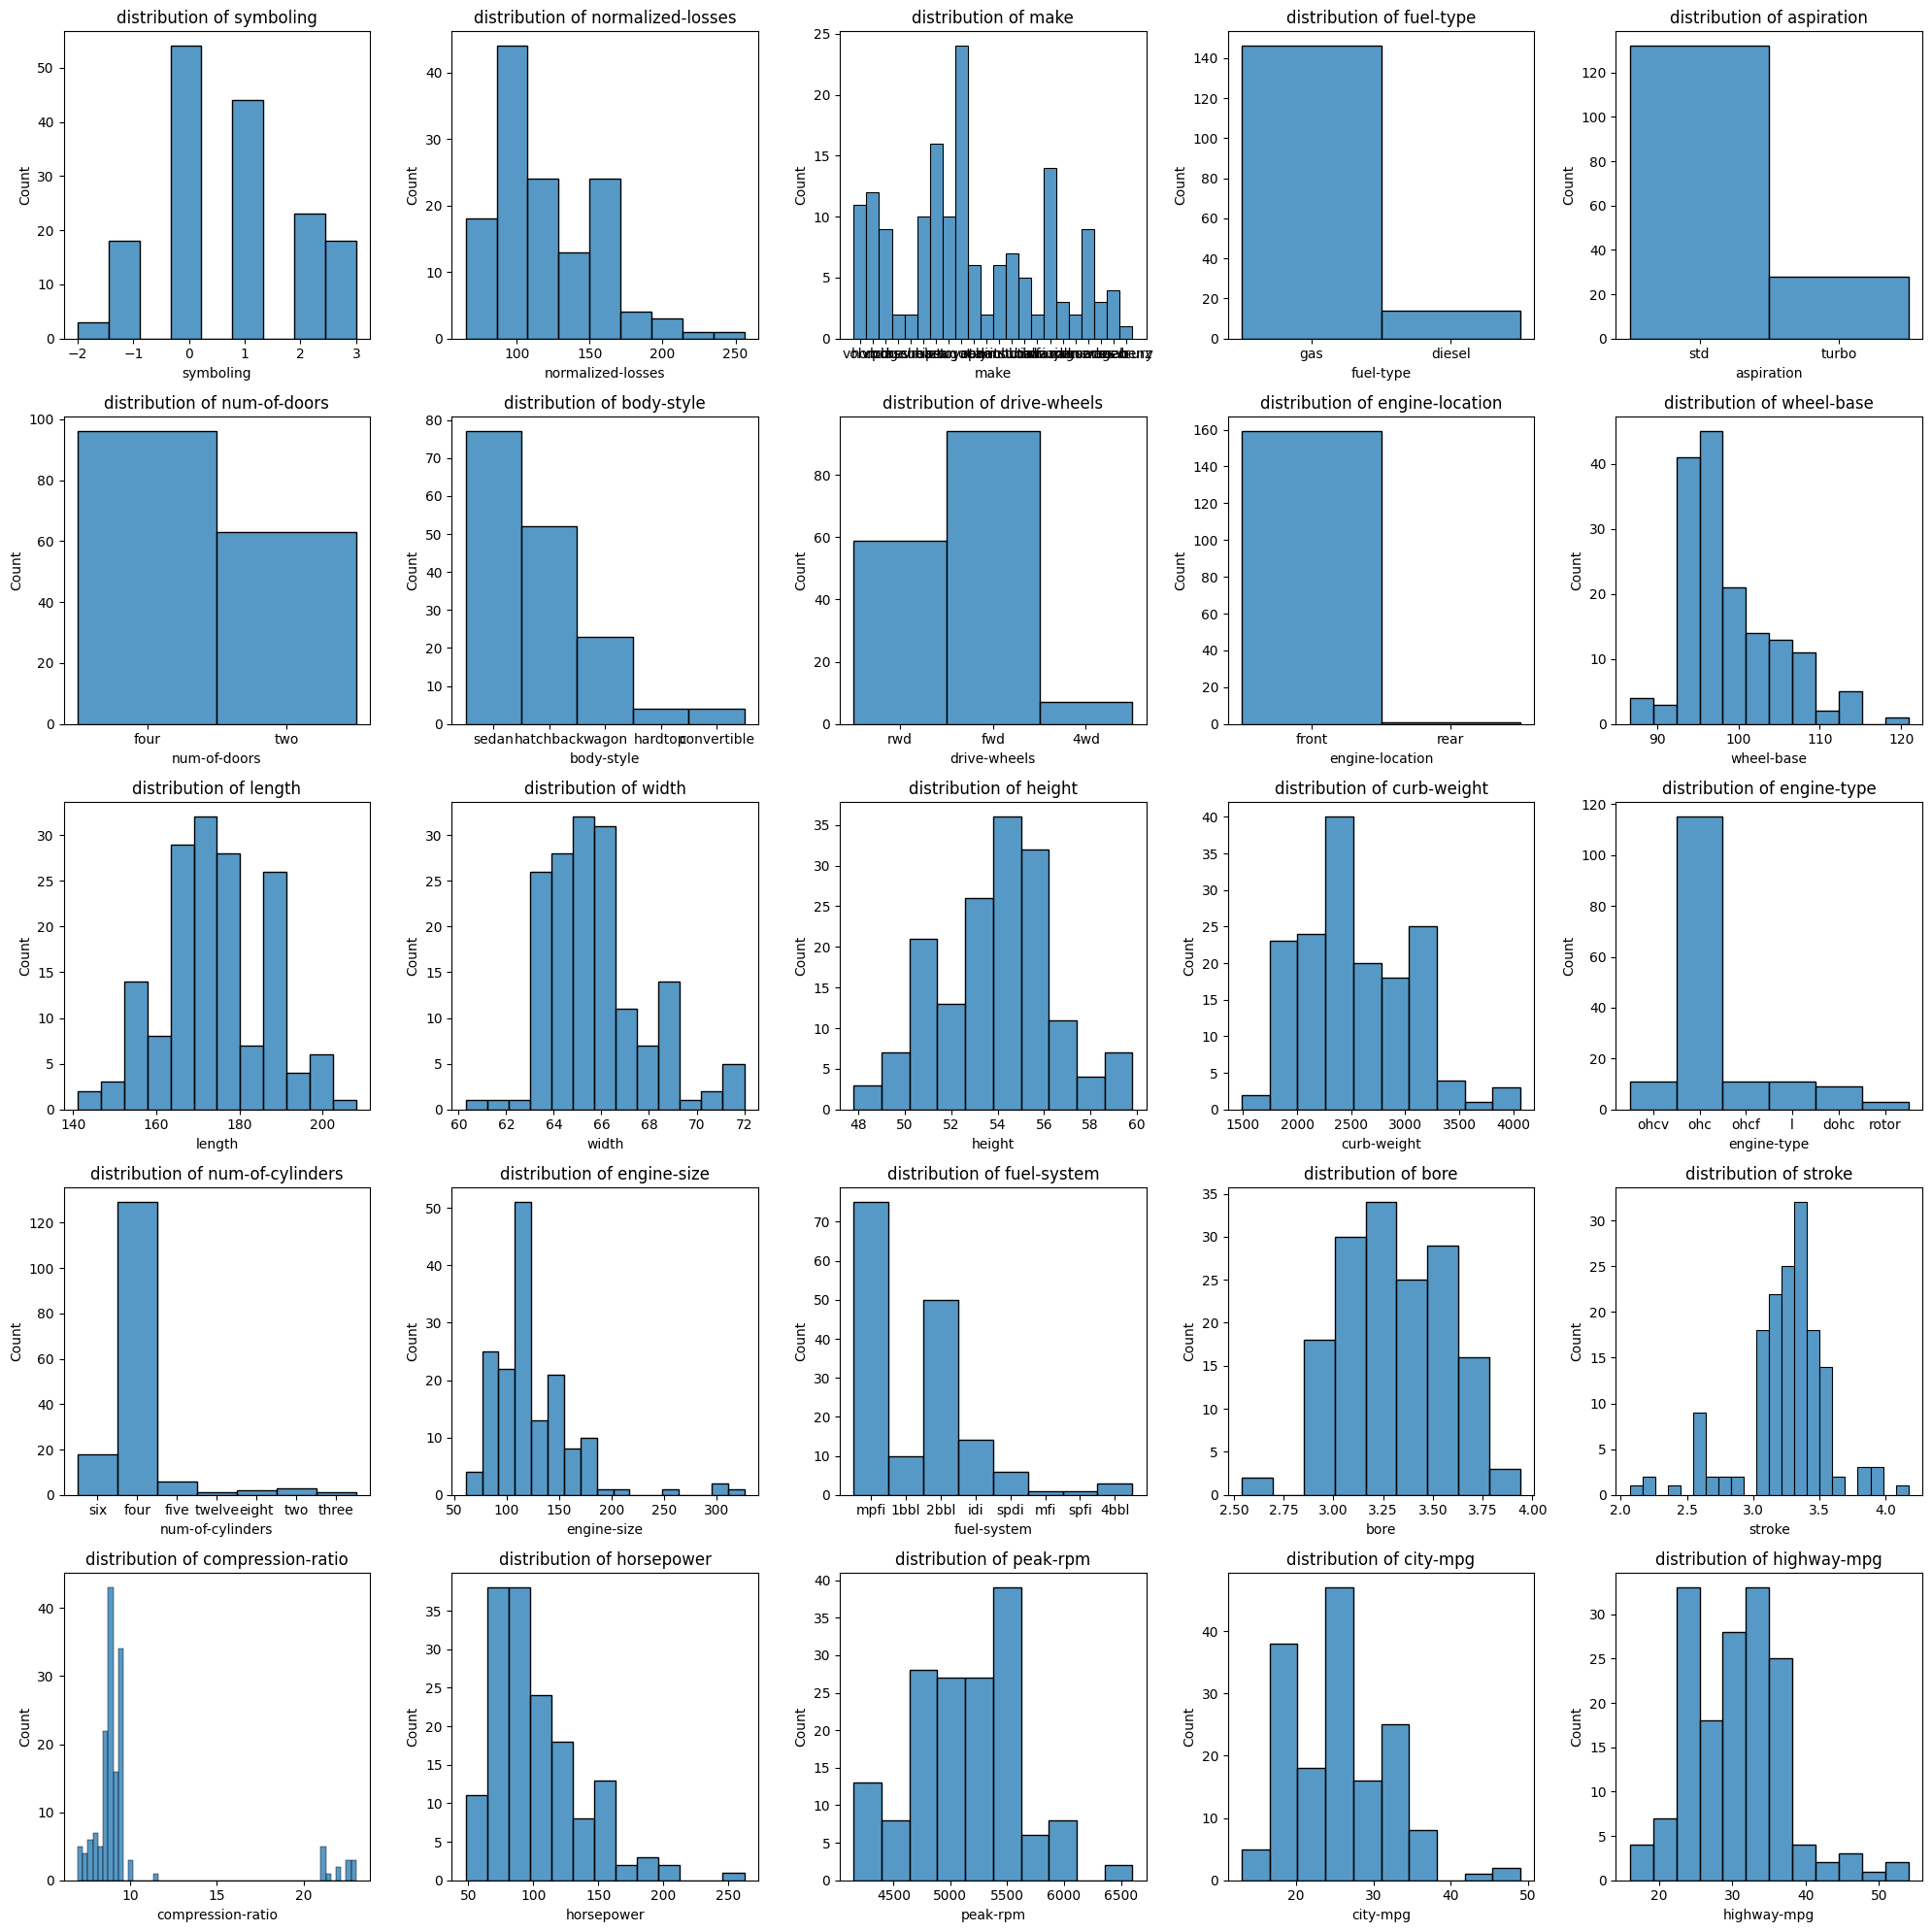

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
f,axes = plt.subplots(5,5,figsize = (20,20))
axes = axes.flatten()
for index,feat in enumerate(X_train.columns):
  sns.histplot(X_train[feat], ax = axes[index])
  axes[index].set(title = f'distribution of {feat}')

plt.tight_layout()
plt.show()



We see that the distribution of engine-type,num-of-cylinders,engine-size,stroke and compression-ratio are very skewed.

We can also observe that some features have outliers such as compression-ration,engine-size,city-mpg,stroke.

# Define pipeline logical steps
With words and explanations, define the specific steps you want to take as a part of your pipeline and explain the reason for each.

**Hints:**
- Think **not** about specific columns, but how to do as similar as possible steps on **multiple** columns using built-in transformers
- To keep this exercise simple, it's **OK to make sub-optimal preprocessing**, as long as it's reasonable.  For example, you don't need to change distribution shapes of continuous features

**You MUST include:**
* NA care
* Removing 1 problematic feature discussed in EDA step above
* Categorical feature encoding
* Data Normalization
* Feature selection / dimensionaliry reduction
* Modeling

#### Answer


To deal with NaN values, we saw on the distribution of those features that filling them by the most frequent value make sense. So we will use SimpleImputer with strategy = 'most_frequent'.

We will remove the feature 'engine-location' as discussed above using a ColumnTransformer with the 'drop' transformer.

We will encode the categorical features in two way inside the ColumnTransformer :
- We will use OneHotEncoder for the categorical nominal features
- We will use OrdinalEncoder to deal with the categorical ordinal features

We will create a class to deal with outliers and clip them using the std method.

As we can see on the plot above, most of the features have a distribution similar to a normal distribution so we will use the StandardScaler to normalize our data.

We will use the selectKbest to keep only 10 features of our data.

We will use a RandomForestRegressor on the 'model' of our pipeline.





# Implement a pipeline
Include all of the steps you mentioned above.

**Hints:**
- You can make some changes to your decisions to make the pipeline simpler, but explain all changes, steps and decisions.
- Notice that by default `ColumnTransformer` will drop all features that were not explicitly given to it in one of the transformers.  This is one way to always drop some columns
- If you are having issues running the pipeline, try to debug parts of the pipeline and the it's outputs
- If you are having issues, make sure you understand what `handle_unknown` parameter options do for various transformers

In [17]:
# your code here
from sklearn.base import BaseEstimator, TransformerMixin

class ClipStd(BaseEstimator,TransformerMixin):
  def __init__(self):
    self.lower_bound = None
    self.upper_bound = None

  def fit(self,X,y = None):
    self.lower_bound = X.mean() - 3 * X.std()
    self.upper_bound = X.mean() + 3 * X.std()
    return self

  def transform(self,X,y = None):
    X = X.clip(self.lower_bound,self.upper_bound)
    return X



In [18]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

pip1 = Pipeline([('simple_inputer_pl',SimpleImputer(strategy = 'most_frequent')),
                 ('one_hot_cat',OneHotEncoder())])

pip2 = Pipeline([('simple_inputer_pl',SimpleImputer(strategy = 'most_frequent')),
                 ('ordin_encode_door',OrdinalEncoder(categories = [['two','four']]))])

pip3 = Pipeline([('simple_inputer_pl',SimpleImputer(strategy = 'most_frequent')),
                 ('ordin_encode_cylinder',OrdinalEncoder(categories = [['two','three','four','five','six','eight','twelve']]))])

ct1 = ColumnTransformer([('drop_column','drop',['engine-location']),
                         ('one_hot_cat',pip1,cat_nom_feat + binary_features),
                         ('ordin_encode_door',pip2,['num-of-doors']),
                         ('ordin_encode_cylinder',pip3,['num-of-cylinders']),
                         ('drop_nan_num_feat',SimpleImputer(strategy = 'most_frequent'),['normalized-losses','bore','stroke','horsepower','peak-rpm'])],
                          remainder = 'passthrough')

fu1 = FeatureUnion([('clip_outliers',ClipStd()),
 ('feature_select', SelectKBest(score_func = f_regression,k = 10))
])


pipe = Pipeline([('column_transformer',ct1),
                 ('feature_union',fu1),
                 ('model',RandomForestRegressor())
                 ])









# Use the pipeline
- Fit the pipeline
- Evaluate the model recieved. Are you satisfied with your score?
- Print your pipeline

In [19]:
pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_column', 'drop',
                                                  ['engine-location']),
                                                 ('one_hot_cat',
                                                  Pipeline(steps=[('simple_inputer_pl',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_cat',
                                                                   OneHotEncoder())]),
                                                  ['make', 'body-style',
                                                   'drive-wheels',
                                                   'engine-type', 'fuel-system',
                                                   'fuel-type', 'aspiratio...
                                                                                               'twelve']]))]),
                                                  ['num-of-cylinders']),
                                                 ('drop_nan_num_feat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['normalized-losses', 'bore',
                                                   'stroke', 'horsepower',
                                                   'peak-rpm'])])),
                ('feature_union',
                 FeatureUnion(transformer_list=[('clip_outliers', ClipStd()),
                                                ('feature_select',
                                                 SelectKBest(score_func=<function f_regression at 0x7aa5d2df17e0>))])),
                ('model', RandomForestRegressor())])

In [20]:
# your code here
pipe.fit(X_train,y_train)
y_pred_pl = pipe.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(y_test,y_pred_pl))

2902.3496064169394

In [22]:
y_test.median()

9988.0

we get a rmse of 2902.
As the median of y_test is close to 10000, the result is quite good.

# Model selection / hyperparam tuning
- Try a few different options for preprocessing and/or modeling, that you think has a good chance to improve the metric of the final model.  Use `RandomizedSearch`
- Is the score better now?
- Print the pipeline chosen by the search
- Print the best hyperparameters of the search

In [23]:
# your code here
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'feature_union__feature_select__k': randint(5, 35),
    'model__n_estimators': randint(50, 200),
    'model__max_depth': randint(5, 20),

}

random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('column_transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('drop_column',
                                                                               'drop',
                                                                               ['engine-location']),
                                                                              ('one_hot_cat',
                                                                               Pipeline(steps=[('simple_inputer_pl',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('one_hot_cat',
                                                                                                OneHotEncoder())]),
                                                                               ['make',
                                                                                'body-style',
                                                                                'drive-wheels',
                                                                                'engine-type',
                                                                                'f...
                   param_distributions={'feature_union__feature_select__k': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aa596a5bfd0>,
                                        'model__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aa5a3a07a60>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7aa597e2d090>},
                   scoring='neg_mean_squared_error', verbose=2)

In [24]:
random_search.best_params_

{'feature_union__feature_select__k': 8,
 'model__max_depth': 15,
 'model__n_estimators': 55}

In [25]:
y_pred_rand = random_search.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test,y_pred_rand))

2807.8896513308496

We get better results than the one we got before the CV. We get a rmse of 2807.